# Term Deposit Marketing

This program aims to develop a machine learning model that can successfully predict whether a customer will subscribe to a term deposit.  Different models will be explored by training, testing and validating.  The goal is to provide a tool back to the client that will help them improve their success rate for calls made to customers for any product they offer.  Features that will be looked at include: age, job, marital status, education, default, balance, housing loan, personal loan, contact method, last contact day, last contact month, last contact duration and number of contacts performed during this campaign.



In [53]:
# Standard
import pandas as pd
import numpy as np
import random
import math

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model helper functions
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

# Analysis Modules
from sklearn.metrics import classification_report, f1_score, precision_score, accuracy_score, recall_score, confusion_matrix
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV, cross_val_score

# Models
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier


#### Import Data

In [2]:
path = 'term-deposit-marketing-2020.csv'
data = pd.read_csv(path)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [4]:
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
count,40000.000000,40000,40000,40000,40000,40000.000000,40000,40000,40000,40000.000000,40000,40000.000000,40000.000000,40000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,11,NaN,NaN,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,no
freq,NaN,9383,24386,20993,39191,NaN,24031,33070,24914,NaN,13532,NaN,NaN,37104
mean,40.544600,NaN,NaN,NaN,NaN,1274.277550,NaN,NaN,NaN,16.017225,NaN,254.824300,2.882175,NaN
std,9.641776,NaN,NaN,NaN,NaN,2903.769716,NaN,NaN,NaN,8.278127,NaN,259.366498,3.239051,NaN
min,19.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,54.000000,NaN,NaN,NaN,8.000000,NaN,100.000000,1.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,407.000000,NaN,NaN,NaN,17.000000,NaN,175.000000,2.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1319.000000,NaN,NaN,NaN,21.000000,NaN,313.000000,3.000000,NaN


In [5]:
# Define Features data types
numericFeatures = ['age', 'balance', 'day', 'duration', 'campaign'] # Numbers
categoricFeatures = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y'] # Strings/Binary Values
# Separate data based off of y value
yesData = data[data.y == 'yes']
noData = data[data.y == 'no']

In [6]:
print('Yes mean data')
print(yesData[numericFeatures].mean())
print('No mean data')
print(noData[numericFeatures].mean())
print('Difference between yes and no mean data (Yes - No)')
print(yesData[numericFeatures].mean()-noData[numericFeatures].mean())

print('\nYes median data')
print(yesData[numericFeatures].median())
print('No median data')
print(noData[numericFeatures].median())
print('Difference between yes and no median data (Yes - No)')
print(yesData[numericFeatures].median()-noData[numericFeatures].median())

print('\nYes max data')
print(yesData[numericFeatures].max())
print('No max data')
print(noData[numericFeatures].max())
print('Difference between yes and no max data (Yes - No)')
print(yesData[numericFeatures].max()-noData[numericFeatures].max())

Yes mean data
age           39.844959
balance     1588.495856
day           15.827003
duration     682.958564
campaign       2.414365
dtype: float64
No mean data
age           40.599208
balance     1249.752533
day           16.032072
duration     221.408042
campaign       2.918688
dtype: float64
Difference between yes and no mean data (Yes - No)
age          -0.754249
balance     338.743323
day          -0.205069
duration    461.550521
campaign     -0.504323
dtype: float64

Yes median data
age          37.0
balance     620.0
day          16.0
duration    629.0
campaign      2.0
dtype: float64
No median data
age          39.0
balance     395.0
day          17.0
duration    164.0
campaign      2.0
dtype: float64
Difference between yes and no median data (Yes - No)
age          -2.0
balance     225.0
day          -1.0
duration    465.0
campaign      0.0
dtype: float64

Yes max data
age            95
balance     45248
day            31
duration     3881
campaign       32
dtype: int64
No ma

# Data Visualization

<Figure size 1080x1080 with 0 Axes>

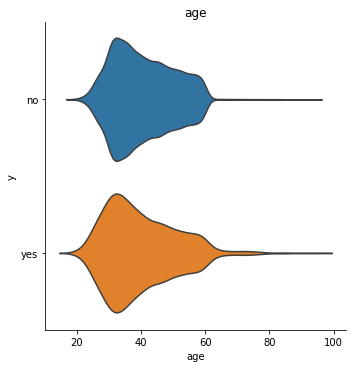

<Figure size 1080x1080 with 0 Axes>

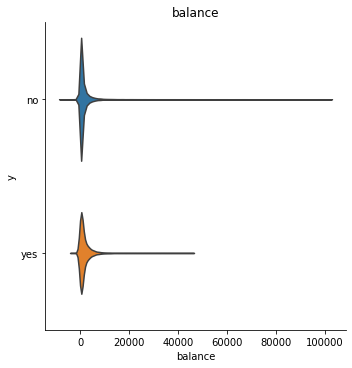

<Figure size 1080x1080 with 0 Axes>

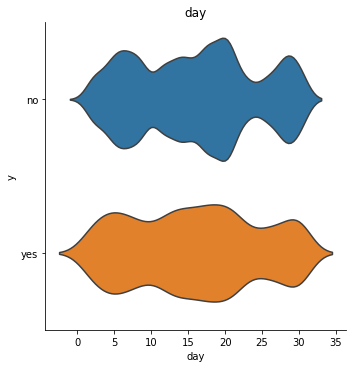

<Figure size 1080x1080 with 0 Axes>

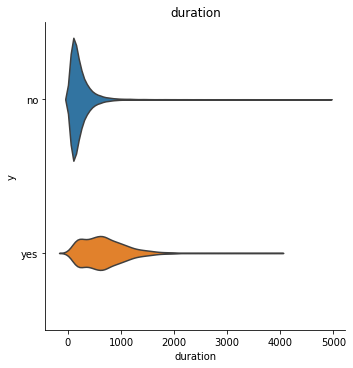

<Figure size 1080x1080 with 0 Axes>

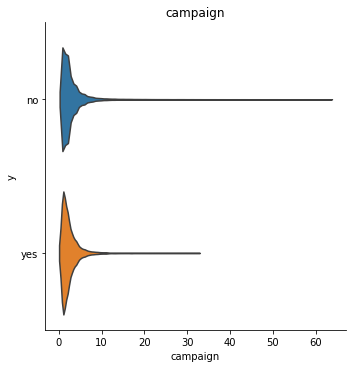

In [7]:
# Create plots to visually compare yes and no data
for feature in numericFeatures :
    plt.figure(figsize=(15,15))
    sns.catplot(x=feature, y='y', kind="violin", inner=None, data=data)
    plt.title(feature)
    plt.show()

This shows a discrepency between the duration of a call and the subscription.  The longer a call persists, the more likely the person is to subscribe to the term deposit.  While there are some variations in the other 

<Figure size 432x288 with 0 Axes>

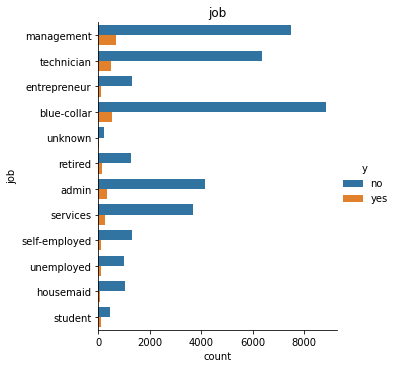

<Figure size 432x288 with 0 Axes>

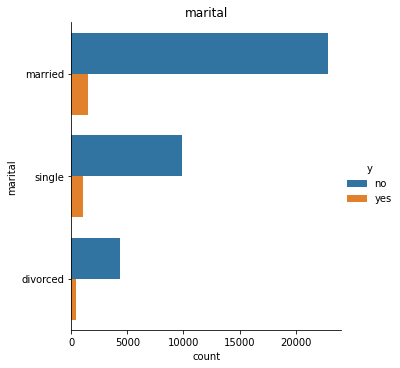

<Figure size 432x288 with 0 Axes>

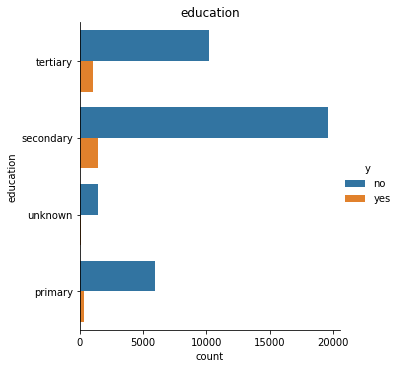

<Figure size 432x288 with 0 Axes>

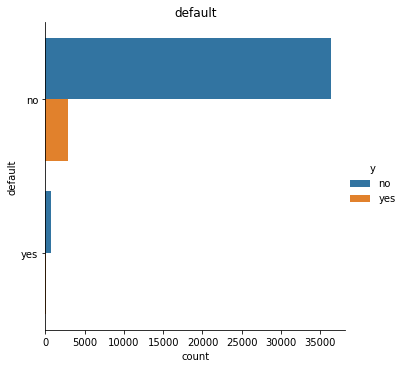

<Figure size 432x288 with 0 Axes>

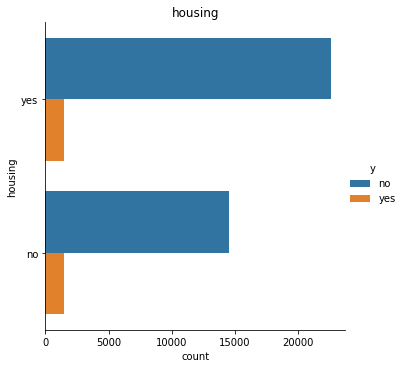

<Figure size 432x288 with 0 Axes>

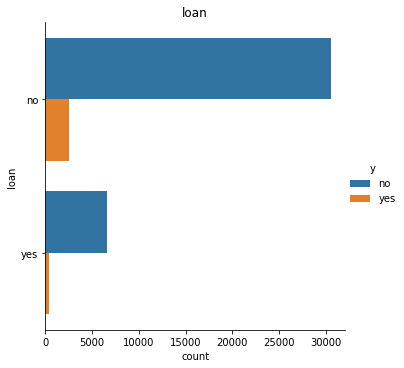

<Figure size 432x288 with 0 Axes>

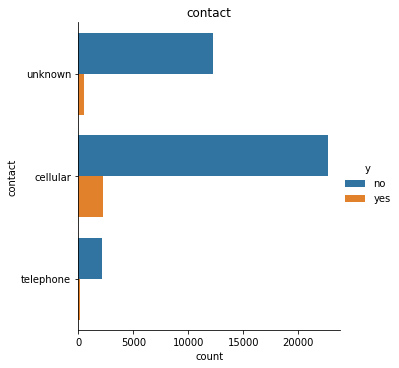

<Figure size 432x288 with 0 Axes>

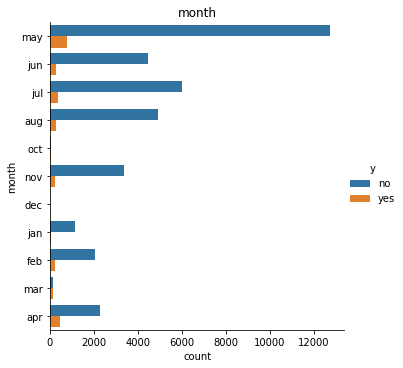

<Figure size 432x288 with 0 Axes>

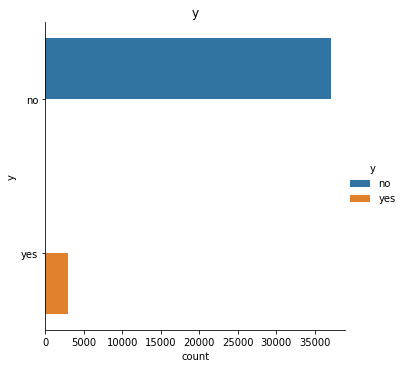

In [8]:
for feature in categoricFeatures :
    plt.figure()#figsize=(15,15))
    sns.catplot(y=feature, hue='y', kind="count", data=data)
    plt.title(feature)
    plt.show()

#### Rename boolean Values to 1s and 0s
features: default, housing, loan, y

In [9]:
# Make a copy of the data
data1 = data.copy()

# Change default
data1.loc[data1.default == 'yes', 'default'] = 1
data1.loc[data1.default == 'no', 'default'] = 0
data1.default = data1.default.astype('int64')

# Change housing
data1.loc[data1.housing == 'yes', 'housing'] = 1
data1.loc[data1.housing == 'no', 'housing'] = 0
data1.housing = data1.housing.astype('int64')

# Change loan
data1.loc[data1.loan == 'yes', 'loan'] = 1
data1.loc[data1.loan == 'no', 'loan'] = 0
data1.loan = data1.loan.astype('int64')

# Change y
data1.loc[data1.y == 'yes', 'y'] = 1
data1.loc[data1.y == 'no', 'y'] = 0
data1.y = data1.y.astype('int64')

# Data Preprocessing
We will be utilizing various methods to adjust our data to be more suitable for these types of models.  Transformation, clipping, binning, one hot encoding.

#### Transformation
Will use: StandardScaler, Yeo Johnson Power Transform and MinMaxScaler

In [10]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler

In [11]:
# Only transforming numeric features
featTransform = ['age', 'balance', 'duration', 'campaign']

# Test skew and kurtosis of data distribution
data1[featTransform].agg(['skew', 'kurtosis']).T

,skew,kurtosis
age,0.436080,-0.503828
balance,8.259236,141.833247
duration,3.165307,18.189852
campaign,4.730901,36.223536


In [12]:
SS = StandardScaler()
SS.fit(data1[featTransform])

SSArr = SS.transform(data1[featTransform])
SSData = pd.DataFrame(SSArr, columns=featTransform)

SSData.agg(['skew', 'kurtosis']).T

,skew,kurtosis
age,0.436080,-0.503828
balance,8.259236,141.833247
duration,3.165307,18.189852
campaign,4.730901,36.223536


In [13]:
MM = MinMaxScaler()
MM.fit(data1[featTransform])

MMArr = MM.transform(data1[featTransform])
MMData = pd.DataFrame(MMArr, columns=featTransform)

MMData.agg(['skew', 'kurtosis']).T

,skew,kurtosis
age,0.436080,-0.503828
balance,8.259236,141.833247
duration,3.165307,18.189852
campaign,4.730901,36.223536


In [14]:
PT = PowerTransformer(method='yeo-johnson')
PT.fit(data1[featTransform])

yJohnsonArr = PT.transform(data1[featTransform])
yJohnsonData = pd.DataFrame(yJohnsonArr, columns=featTransform)

yJohnsonData.agg(['skew', 'kurtosis']).T

,skew,kurtosis
age,0.001901,-0.770615
balance,1.058649,82.982952
duration,0.013301,0.360479
campaign,0.213011,-1.169580


#### Summary
Yeo Johnson transformation was the only one that produced a decrease in skew.  Therefore this will be used going forward to preprocess the data.
#### Clipping
Remove any large outliers from the dataset, skew values for age, duration and campaign are < 0.5 therefore will be focusing on the balance feature.  Calculating Z scores for the whole data set and then eliminating all the values with Z score > 3

In [15]:
# Clipping values of p(z) > 3 from the data set after transformation
# Calculate Z score for transformed valeus
zTransForm = np.abs(zscore(yJohnsonData.balance))

print('# entries w/ p(z) > 3: ', len(np.where(zTransForm > 3)[0]))
print('Data entries lost', (len(np.where(zTransForm > 3)[0])/len(yJohnsonData.balance)))

# Create new dataFrame without entries that have a z value > 3
data2 = data1.drop(np.where(zTransForm > 3)[0], axis=0).reset_index(drop=True)

# entries w/ p(z) > 3:  765
Data entries lost 0.019125


In [16]:
print(len(data1))

40000


#### Binning
The following features will be placed into bins to group similar values together: Age, Job, Balance, Duration, Campaign.

We will first identify the interquartile range of the column, subtract 1.5 x IQR from Q1 and add 1.5 x IQR to Q3 to get the appropriate ranges to make the bins from.  The range will then be divided into an appropriate number of bins.

In [17]:
# Copy data base
data3 = data2.copy()

# Create function to identify bins
def identifyBinRange(data) :
    data.sort_values()
    Q1, Q3 = np.percentile(data,[25,75])
    lower = 2.5*Q1 - 1.5*Q3 if data.min() != 0 else 0
    upper = 2.5*Q3 - 1.5*Q1
    
    return lower, upper


##### Age

In [18]:
print('Age Range ', identifyBinRange(data3.age))

Age Range  (10.5, 70.5)


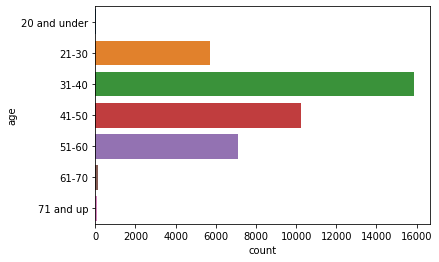

In [19]:
# Initialize bin ranges and their labels
bins = [0, 20, 30, 40, 50, 60, 70, data2.age.max()]
labels = ['20 and under', '21-30', '31-40', '41-50', '51-60', '61-70', '71 and up']

data3.age = pd.cut(data2.age, bins=bins, labels=labels)

sns.countplot(data=data3, y='age')
plt.show()

##### Duration

In [20]:
print('Duration Range (minutes) ', identifyBinRange(data3.duration)[0]/60, identifyBinRange(data3.duration)[1]/60)

Duration Range (minutes)  0.0 10.541666666666666


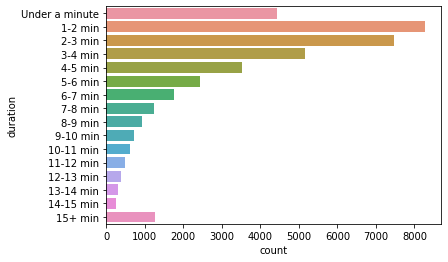

In [21]:
bins = [0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600,
        660, 720, 780, 840, 900, data3.duration.max()]
labels = ['Under a minute', '1-2 min', '2-3 min', '3-4 min', '4-5 min',
          '5-6 min', '6-7 min', '7-8 min', '8-9 min', '9-10 min', '10-11 min',
          '11-12 min', '12-13 min', '13-14 min', '14-15 min', '15+ min']


data3.duration = pd.cut(data2.duration, bins=bins, labels=labels)

sns.countplot(data=data3, y='duration')
plt.show()


##### Campaign

In [22]:
print('Campaign Range ', identifyBinRange(data3.campaign))

Campaign Range  (-2.0, 6.0)


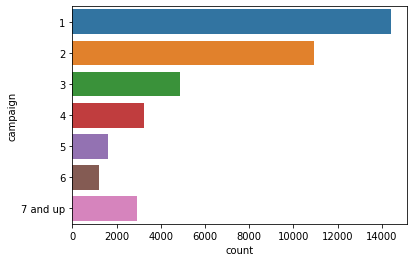

In [23]:
# Since campaign starts at 1 ignore the -2.0, start the bins from 0-6 and
# campaigns 7 and up will be grouped together as outliers

bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, data3.campaign.max()]
labels = ['1', '2', '3', '4', '5', '6', '7 and up']

data3.campaign = pd.cut(data2.campaign, bins = bins, labels = labels)

sns.countplot(data=data3, y='campaign')
plt.show()

##### Balance

In [24]:
print('Balance Range ', identifyBinRange(data3.balance))
print('Balance min ', data3.balance.min())

Balance Range  (-1757.0, 3075.0)
Balance min  -892


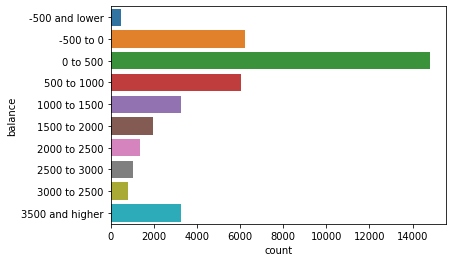

In [25]:
# Bins:  -500 and lower up to 3500 and up in increments of 500
bins = [-1000, -500, 0, 500, 1000,
        1500, 2000, 2500, 3000, 3500, math.ceil(data2.balance.max())]
labels = ['-500 and lower',
         '-500 to 0', '0 to 500', '500 to 1000', '1000 to 1500', '1500 to 2000',
         '2000 to 2500', '2500 to 3000', '3000 to 2500', '3500 and higher']


data3.balance = pd.cut(data2.balance, bins = bins, labels = labels)

sns.countplot(data=data3, y='balance')
plt.show()

##### Job

In [26]:
data3.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

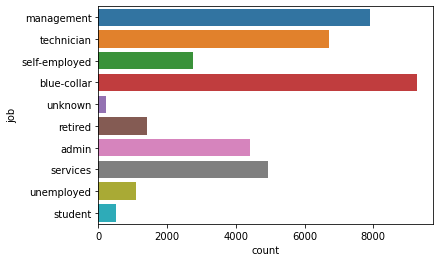

In [27]:
# Group entrepeneur with self employed, housemade with services
data3.loc[data3.job == 'entrepreneur', 'job'] = 'self-employed'
data3.loc[data3.job == 'housemaid', 'job'] = 'services'

sns.countplot(data=data3, y='job')
plt.show()

In [28]:
data3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,51-60,management,married,tertiary,0,2000 to 2500,1,0,unknown,5,may,4-5 min,1,0
1,41-50,technician,single,secondary,0,0 to 500,1,0,unknown,5,may,2-3 min,1,0
2,31-40,self-employed,married,secondary,0,0 to 500,1,1,unknown,5,may,1-2 min,1,0
3,41-50,blue-collar,married,unknown,0,1500 to 2000,1,0,unknown,5,may,1-2 min,1,0
4,31-40,unknown,single,unknown,0,0 to 500,0,0,unknown,5,may,3-4 min,1,0


#### One Hot Encoding
Create new dataframe with new binary columns for new bins created previously using get dummies

In [29]:
data4 = data3.copy()
data4 = pd.get_dummies(data4)

# Rename 'y' to subscribed
data4 = data4.rename(columns={"y": "subscribed"})

month_dec                 0.000319
job_technician            0.001416
job_unknown               0.002035
contact_telephone         0.002118
job_self-employed         0.002168
campaign_3                0.002412
balance_-500 and lower    0.004197
campaign_4                0.005498
default                   0.005761
day                       0.005876
Name: subscribed, dtype: float64
duration_Under a minute    0.098340
duration_10-11 min         0.107518
duration_12-13 min         0.115548
duration_13-14 min         0.120862
duration_1-2 min           0.121019
month_mar                  0.127629
duration_14-15 min         0.130902
duration_11-12 min         0.140021
duration_15+ min           0.362165
subscribed                 1.000000
Name: subscribed, dtype: float64


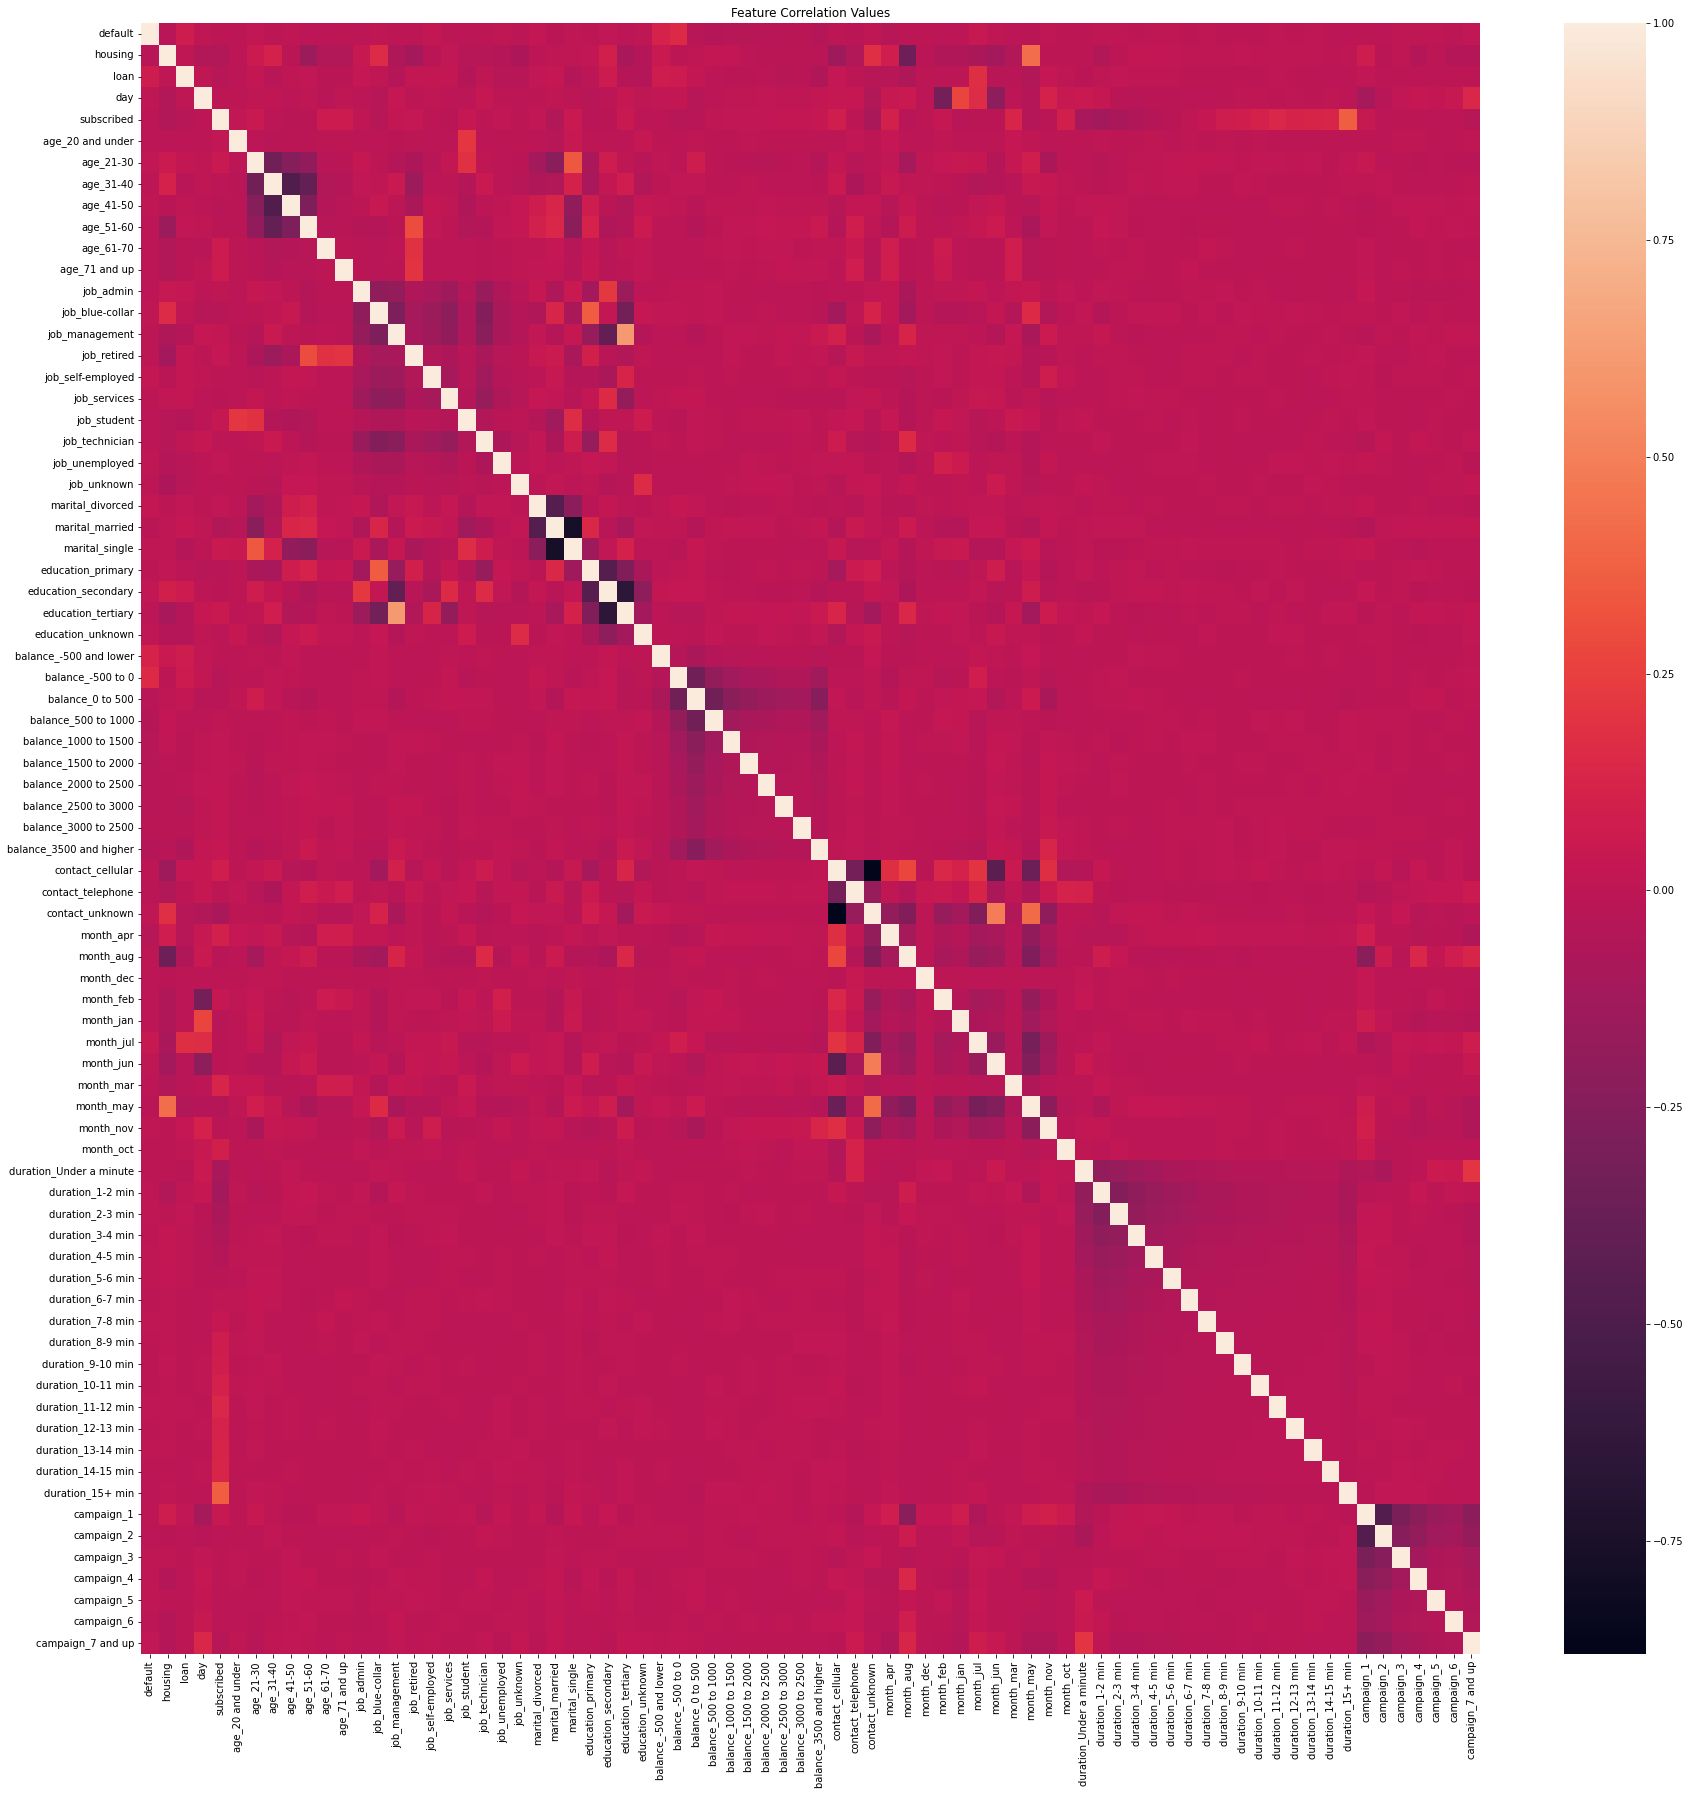

In [30]:
# Get feature correlation values
featureCorrelation = data4.corr()
corrToSubscription = np.abs(featureCorrelation['subscribed']).sort_values()
print(corrToSubscription.head(10))
print(corrToSubscription.tail(10))

# Plot Correlation values
plt.figure(figsize=(30,30))
plt.title('Feature Correlation Values')
sns.heatmap(data4.corr())
plt.show()

# Modelling

In [31]:
modelList = [LogisticRegression(max_iter=10000), 
             SGDClassifier(), 
             Perceptron(),
             SVC(),
             KNeighborsClassifier(),
             RandomForestClassifier(),
             ExtraTreesClassifier(),
             GaussianNB(),
             BernoulliNB(),
             DecisionTreeClassifier()
            ]

modelName = ['LogisticRegression',
            'SGD',
            'Perceptron',
            'SVM',
            'KNN',
            'RandomForest',
            'ExtraTrees',
            'Gaussian',
            'Bernoulli',
            'DecisionTree'
            ]

In [32]:
# Set random state
seedValue = 4
random.seed(seedValue)

In [33]:
X = data4.drop(columns='subscribed')
Y = data4.subscribed

# Split Data
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size = 0.8, random_state=seedValue)

In [34]:
def getBestModel(modelList, modelName, xTrain, yTrain, xTest, yTest) :

    resultDF = pd.DataFrame()

    for i in range(len(modelList)) :
        model = modelList[i]
        model = model.fit(xTrain, yTrain)
        yPredict = model.predict(xTest)
        result = {'name': modelName[i],
                  'model': model,
                 'F1 Score': f1_score(yTest, yPredict),
                 'Accuracy': accuracy_score(yTest, yPredict),
                 'Precision': precision_score(yTest, yPredict),
                 'Recall': recall_score(yTest, yPredict),
                 'yPredict': yPredict}

        resultDF = resultDF.append(result, ignore_index=True)

    resultDF = resultDF.set_index('name')
    
    return resultDF

In [35]:
resultDF_1 = getBestModel(modelList, modelName, xTrain, yTrain, xTest, yTest)

In [36]:
resultDF_1.drop(columns=['model', 'yPredict'])

,Accuracy,F1 Score,Precision,Recall
name,,,,
LogisticRegression,0.933223,0.422907,0.587156,0.330465
SGD,0.930547,0.202050,0.676471,0.118761
Perceptron,0.928890,0.459302,0.525499,0.407917
SVM,0.926086,0.003436,1.000000,0.001721
KNN,0.926469,0.113671,0.528571,0.063683
RandomForest,0.931821,0.403567,0.572785,0.311532
ExtraTrees,0.932713,0.427332,0.577713,0.339071
Gaussian,0.887855,0.490741,0.369660,0.729776
Bernoulli,0.929655,0.436735,0.536341,0.368330


##### Summary
Accuracy is high ~ 90% but recall, precision and f1 score are all lower.  Will try upsampling and down sampling to improve the models ability to recognize the less represented class

In [37]:
# Down Sampling
down = RandomUnderSampler(random_state = seedValue)     
xDown, yDown = down.fit_resample(xTrain, yTrain)

# Up Sampling
up = RandomOverSampler(random_state = seedValue)
xUp, yUp = up.fit_resample(xTrain, yTrain)

#SMOTE
smote = SMOTE(random_state = seedValue)
xSmote, ySmote = smote.fit_resample(xTrain, yTrain)

In [38]:
resultsDF_Up = pd.DataFrame()
resultsDF_Up = getBestModel(modelList, modelName, xUp, yUp, xTest, yTest)
resultsDF_Up.drop(columns=['model', 'yPredict'])

,Accuracy,F1 Score,Precision,Recall
name,,,,
LogisticRegression,0.864024,0.481787,0.335589,0.853701
SGD,0.726647,0.338983,0.206456,0.946644
Perceptron,0.848987,0.463072,0.314268,0.879518
SVM,0.864534,0.484731,0.337382,0.860585
KNN,0.847458,0.295468,0.224508,0.432014
RandomForest,0.930547,0.474446,0.539474,0.423408
ExtraTrees,0.931439,0.402222,0.567398,0.311532
Gaussian,0.882630,0.484611,0.359038,0.745267
Bernoulli,0.820059,0.416529,0.274062,0.867470


In [39]:
resultsDF_Down = pd.DataFrame()
resultsDF_Down = getBestModel(modelList, modelName, xDown, yDown, xTest, yTest)
resultsDF_Down.drop(columns=['model', 'yPredict'])

,Accuracy,F1 Score,Precision,Recall
name,,,,
LogisticRegression,0.863132,0.480155,0.334007,0.853701
SGD,0.920734,0.384158,0.452214,0.333907
Perceptron,0.698483,0.318156,0.191070,0.950086
SVM,0.831018,0.432849,0.287991,0.870912
KNN,0.731107,0.260687,0.163660,0.640275
RandomForest,0.854594,0.477803,0.325436,0.898451
ExtraTrees,0.848095,0.461121,0.312692,0.877797
Gaussian,0.886071,0.483237,0.363795,0.719449
Bernoulli,0.814069,0.407633,0.266738,0.864028


In [40]:
resultsDF_Smote = pd.DataFrame()
resultsDF_Smote = getBestModel(modelList, modelName, xSmote, ySmote, xTest, yTest)
resultsDF_Smote.drop(columns=['model', 'yPredict'])

,Accuracy,F1 Score,Precision,Recall
name,,,,
LogisticRegression,0.932458,0.431330,0.572650,0.345955
SGD,0.866446,0.462012,0.329188,0.774527
Perceptron,0.929527,0.482694,0.528689,0.444062
SVM,0.934625,0.482341,0.582927,0.411360
KNN,0.695552,0.259225,0.158094,0.719449
RandomForest,0.930674,0.452716,0.544794,0.387263
ExtraTrees,0.931311,0.417297,0.561047,0.332186
Gaussian,0.869122,0.399766,0.302655,0.588640
Bernoulli,0.893462,0.450000,0.364217,0.588640


<Figure size 432x288 with 0 Axes>

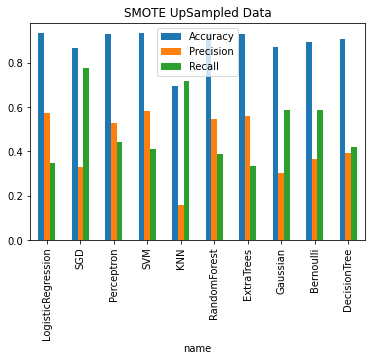

In [41]:
plt.figure()
resultsDF_Smote.plot(y=['Accuracy', 'Precision', 'Recall'], kind='bar')
plt.title('SMOTE UpSampled Data')
plt.show()

<Figure size 432x288 with 0 Axes>

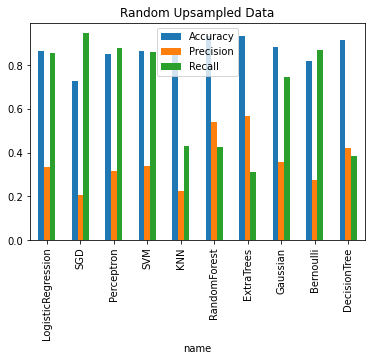

In [42]:
plt.figure()
resultsDF_Up.plot(y=['Accuracy', 'Precision', 'Recall'], kind='bar')
plt.title('Random Upsampled Data')
plt.show()

<Figure size 432x288 with 0 Axes>

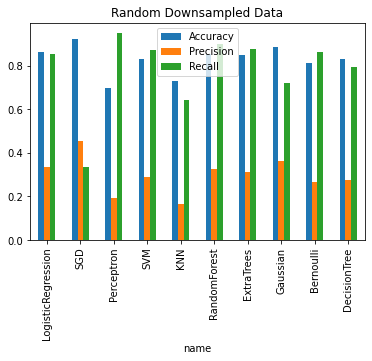

In [43]:
plt.figure()
resultsDF_Down.plot(y=['Accuracy', 'Precision', 'Recall'], kind='bar')
plt.title('Random Downsampled Data')
plt.show()

##### Summary
SMOTE produces higher recall and precision scores on average for all the models compared to random up.down sampling so that will be the data balancing method that will be used.  3 models will be picked to explore further via hyperparameter tuning.  Perceptron SVM and Random Forest models will be further explored as their results are best.

#### SVM

In [59]:
def evaluateModel(classifier) :
    clf = classifier
    clf.fit(xSmote, ySmote)
    predict = clf.predict(xTest)
    
    # 5 fold cross validation
    CVScore = cross_val_score(clf, X=xSmote, y=ySmote, cv=5)
    accuracy = accuracy_score(yTest, predict)
    
    print("Cross Validation Score Average: ", CVScore.mean())
    print("Test Accuracy: ", accuracy)
    
    return clf, predict


In [60]:
SVM, SVMpredict = evaluateModel(SVC())

Cross Validation Score Average:  0.9509949921570419
Test Accuracy:  0.9346246973365617


#### Random Forest

In [61]:
RF, RFpredict = evaluateModel(RandomForestClassifier())

Cross Validation Score Average:  0.9670093233629636
Test Accuracy:  0.9323308270676691


#### Perceptron

In [63]:
perceptron, pPredict = evaluateModel(Perceptron())

Cross Validation Score Average:  0.8751083852104118
Test Accuracy:  0.9295272078501338


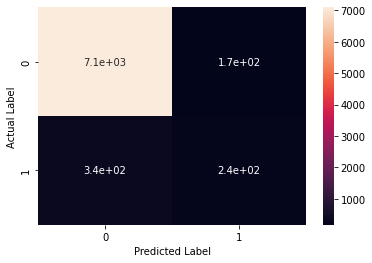

In [68]:
confMatrix = confusion_matrix(yTest, SVMpredict)
dfConfMatrix = pd.DataFrame(confMatrix, index = [i for i in "01"], 
                            columns = [i for i in "01"])


# Plot Confusion matrix
plt.figure()
sns.heatmap(dfConfMatrix, annot = True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Summary
These results show that machine learning models can be produced to detertmine whether or not a customer will subscribe to a term deposit.  The support vector machine model has a 5 fold cross validation accuracy of 95% with a test accuracy of 93%.  This is the model that will be chosen. From looking at the data correlation, the longer the duration of a call is the most highly correlated with subscription.  Other features that had high importance is day of the month (towards the end of the month), having a housing loan, and a lower balance.